In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Confusion matrix & metrics

In [79]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## (1) 데이터 준비

In [80]:
# classification 위한 임의의 데이터 생성 -> X: 2개 feature, y:binary 인 데이터 샘플 100개
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

In [81]:
model = LogisticRegression().fit(X,y)

y_score = model.decision_function(X)  
y_pred = model.predict(X)

# decision_function(): 판별함수 결과값 계산
# predict(): y_score가 양수이면 y=1, 음수이면 y=0으로 분류

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
y

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [83]:
y_score

array([ 2.97312651e+00,  2.32339121e+00, -4.26743902e+00, -3.90928300e+00,
       -3.05736112e+00, -1.93353266e+00, -2.17398334e+00,  2.43208753e+00,
       -1.82477633e-01, -4.10165783e+00, -1.03285162e-01, -2.84197465e+00,
        7.26536167e-01,  2.12195055e-01,  1.79131272e+00,  2.95454946e+00,
        1.46930756e+00,  2.06813561e+00, -7.60882741e-02, -2.42506364e+00,
        4.23760432e+00, -4.73262605e-02,  3.60875579e+00, -1.85034866e+00,
       -5.25298334e-01, -1.76197631e+00, -1.93706742e+00, -4.04663929e+00,
        2.93184685e+00,  2.92965849e+00, -3.32271660e-01,  4.15364812e+00,
        3.13675229e+00, -2.31600693e+00, -2.87305004e+00,  1.63007655e+00,
       -2.68360093e-01, -2.04694776e+00,  3.27909847e+00,  3.48555112e+00,
        2.65504975e+00, -2.55288223e+00,  1.32554071e+00, -1.69856735e+00,
       -1.36813626e+00, -2.45849466e+00, -1.85452750e+00, -3.63856191e+00,
        5.14291927e+00,  4.74497746e+00, -3.03921095e+00, -1.41653015e+00,
        2.65859864e+00, -

In [84]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [85]:
# 데이터프레임 형태로 확인해 보자

df = pd.DataFrame(np.vstack([y_score, y_pred, y]).T,columns=["y_score", "y_pred", "y"])
df = df.sort_values("y_score", ascending=False).reset_index(drop=True)

In [86]:
display(df.head(), df.tail())

,y_score,y_pred,y
0,6.721578,1.0,1.0
1,5.142919,1.0,1.0
2,4.744977,1.0,1.0
3,4.237604,1.0,1.0
4,4.153648,1.0,1.0


,y_score,y_pred,y
95,-3.793732,0.0,0.0
96,-3.909283,0.0,0.0
97,-4.046639,0.0,0.0
98,-4.101658,0.0,0.0
99,-4.267439,0.0,0.0


## (2) confusion matrix 생성

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

In [90]:
print(confusion_matrix(y, y_pred)) # TP FN FP TN

[[48  3]
 [ 6 43]]


In [91]:
print('accuracy score: ',accuracy_score(y, y_pred) )
print('precision score: ',precision_score(y, y_pred) )
print('recall score: ',recall_score(y, y_pred) )
print('f1 score: ',f1_score(y, y_pred) )

accuracy score:  0.91
precision score:  0.9347826086956522
recall score:  0.8775510204081632
f1 score:  0.9052631578947369


In [92]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        51
           1       0.93      0.88      0.91        49

   micro avg       0.91      0.91      0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



In [93]:
# 로지스틱 회귀의 threshold(임계값) 를 0이 아닌 -2로 지정해 보자 
lower_threshold = model.decision_function(X) > -2

df2 = pd.DataFrame(np.vstack([y_score, lower_threshold, y]).T,
                  columns=["y_score", "y_hat", "y"])
df2 = df2.sort_values("y_score", ascending=False).reset_index(drop=True)


In [94]:
display(df2[(df2['y_score']> -2.5) & (df2['y_score']<-1.5)])

,y_score,y_hat,y
64,-1.507268,1.0,0.0
65,-1.549815,1.0,0.0
66,-1.588645,1.0,0.0
67,-1.696229,1.0,0.0
68,-1.698567,1.0,0.0
69,-1.701874,1.0,0.0
70,-1.761976,1.0,0.0
71,-1.782966,1.0,0.0
72,-1.850349,1.0,0.0
73,-1.854528,1.0,0.0


In [95]:
print(confusion_matrix(y, lower_threshold))

[[22 29]
 [ 1 48]]


In [96]:
print(classification_report(y, lower_threshold))

              precision    recall  f1-score   support

           0       0.96      0.43      0.59        51
           1       0.62      0.98      0.76        49

   micro avg       0.70      0.70      0.70       100
   macro avg       0.79      0.71      0.68       100
weighted avg       0.79      0.70      0.68       100



# 2. ROC, PR 곡선 그리기

In [97]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

In [98]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [103]:
model = LogisticRegression().fit(X,y)
y_score = model.fit(X_train, y_train).decision_function(X_test)
y_pred = model.fit(X_train, y_train).predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [104]:
# calculate AUC
roc_auc = roc_auc_score(y_test, y_score)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [105]:
print(roc_auc)

0.9610855094726063


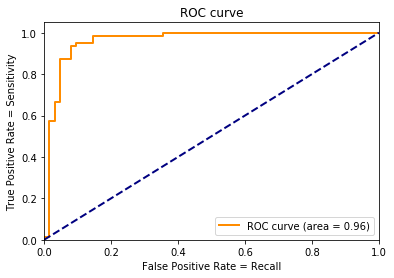

In [106]:
plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [108]:
print(confusion_matrix(y_test, y_pred))

[[57  5]
 [ 4 59]]


# 3. Cross Validation

In [109]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [110]:
cv = KFold(n_splits=3, shuffle=True, random_state=0)

for train_index, test_index in cv.split(X):
    print(X[train_index], y[test_index])
    
# cv.split(X)는 X를 k-fold로 나눈 뒤 각 fold에서의 (train_index, test_index)를 반환하는 iterable

[[-0.65531264  0.98892479]
 [-1.79662003 -1.50654528]
 [-1.59561526 -1.45889738]
 [ 0.58892341 -0.46789568]
 [-2.38275069  0.3927247 ]
 [ 1.29250084 -1.72680318]
 [ 0.80641381 -1.35239056]
 [ 2.46882383  2.22296987]
 [ 0.47533037 -0.83177849]
 [-1.61381139  0.81917045]
 [ 0.9935472  -0.16590016]
 [ 1.55365119  1.52562128]
 [ 2.70917615  2.31802563]
 [ 1.1407577  -2.45858776]
 [ 0.2460986   0.50046624]
 [ 0.44428238 -0.19341211]
 [-2.42359021  0.32849027]
 [ 2.29831037 -3.14931553]
 [ 2.62913375  2.26488259]
 [ 0.81100165 -1.80585035]
 [-0.06790372  1.66941426]
 [-0.15040346  1.30310943]
 [ 0.10831347  1.30520705]
 [ 1.31867033 -2.32820911]
 [ 1.27701924 -0.77099088]
 [-0.63238981 -0.52720944]
 [ 0.39211163  1.54037769]
 [-2.13438435 -1.37739325]
 [ 1.46485262 -1.86587363]
 [ 0.18466376 -0.2506066 ]
 [-0.32324482 -0.15480843]
 [-1.61520296  1.38038844]
 [-0.0642182  -0.50733321]
 [-0.90506249 -0.68753572]
 [ 2.20802432  1.86390664]
 [ 1.28943798 -2.00610659]
 [-1.0322413  -1.43683194]
 

In [111]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0) # target이 골고루 분포되도록 shuffle 옵션

In [112]:
scores = cross_val_score(LogisticRegression(), X, y, cv=kfold)  # cross_val_score(모델, 데이터, 타깃)
scores # 각 fold에 대한 score

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

array([0.95, 0.89, 0.9 , 0.95, 0.93])

In [113]:
scores = cross_val_score(LogisticRegression(), X, y) 
scores 
# cross_val_score의 기본값은 k=3

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95209581, 0.90419162, 0.90963855])

In [114]:
scores = cross_val_score(LogisticRegression(), X, y, cv=5)
scores
# cross_val_score는 기본적으로 분류 모델에 대해 StratifiedKfold 사용

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

array([0.96039604, 0.92079208, 0.91      , 0.88888889, 0.93939394])

In [115]:
display(scores.mean(), scores.var()) # 교차검증 점수들의 평균과 분산 확인

0.923894189418942

0.0006001339937574118

# 4. Grid Search

In [116]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [117]:
iris_data = load_iris()

In [118]:
X_train, X_test, y_train,y_test = train_test_split(iris_data.data,iris_data.target, test_size = 0.2, random_state = 121)

In [119]:
dtree = DecisionTreeClassifier()

In [120]:
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [121]:
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit = True)

In [122]:
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [123]:
scores_df = pd.DataFrame(grid_dtree.cv_results_)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\de

In [124]:
scores_df[['params', 'mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [125]:
print('GridSearchCV 최적 파라미터: ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터:  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [126]:
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667
